In [1]:
import os
import utilities as rocku
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing as mp
import timeit
from pystackreg import StackReg
from PIL import Image

In [2]:
ncore = mp.cpu_count()
ncore

48

In [3]:
# need to change
ipts="31883"
# scan_type = 'ct_scans'
# scan_type = 'radiographs'
scan_type = 'processed_data'
# scan_type = 'analysis'

In [4]:
scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/" + scan_type
folder_list = os.listdir(scan_loc)
folder_list.sort()
folder_list

['2023_07_26_Al_FSW']

In [5]:
sample_name = "2023_07_26_Al_FSW"
distance_to_G2_cm = 0.5
# distance_to_G2_cm = 2.7
trans_off = 197
# trans_off = 193
pos_list = None
# pos_list = [193, 173, 153, 133, 113, 93, 73, 53, 33, 13, 0]
reverse = True
######################
wavelen_ang = 2.5
period_um = 56.5
######################
scan_dir = os.path.join(scan_loc, sample_name)
fname_list = os.listdir(scan_dir)
fname_list.sort()
name_pattern = ["TI_ACL", "DFI_ACL", "DPC_ACL"]
fname_dict = {}
for e_pa in name_pattern:
    _fname_list = rocku.filter_list(fname_list, e_pa)
    _fname_list.sort(reverse=reverse)
    fname_dict[e_pa] = _fname_list
fname_dict

{'TI_ACL': ['TI_ACL_197.fits',
  'TI_ACL_192.fits',
  'TI_ACL_187.fits',
  'TI_ACL_182.fits',
  'TI_ACL_177.fits',
  'TI_ACL_172.fits',
  'TI_ACL_167.fits',
  'TI_ACL_162.fits',
  'TI_ACL_157.fits',
  'TI_ACL_152.fits',
  'TI_ACL_147.fits',
  'TI_ACL_142.fits',
  'TI_ACL_137.fits',
  'TI_ACL_132.fits',
  'TI_ACL_127.fits',
  'TI_ACL_122.fits',
  'TI_ACL_117.fits',
  'TI_ACL_112.fits',
  'TI_ACL_107.fits',
  'TI_ACL_102.fits',
  'TI_ACL_097.fits',
  'TI_ACL_092.fits',
  'TI_ACL_087.fits',
  'TI_ACL_082.fits',
  'TI_ACL_077.fits',
  'TI_ACL_072.fits',
  'TI_ACL_067.fits',
  'TI_ACL_062.fits',
  'TI_ACL_057.fits',
  'TI_ACL_052.fits',
  'TI_ACL_047.fits',
  'TI_ACL_042.fits',
  'TI_ACL_037.fits',
  'TI_ACL_032.fits',
  'TI_ACL_027.fits',
  'TI_ACL_022.fits',
  'TI_ACL_017.fits',
  'TI_ACL_012.fits',
  'TI_ACL_007.fits',
  'TI_ACL_002.fits'],
 'DFI_ACL': ['DFI_ACL_197.fits',
  'DFI_ACL_192.fits',
  'DFI_ACL_187.fits',
  'DFI_ACL_182.fits',
  'DFI_ACL_177.fits',
  'DFI_ACL_172.fits',
  'DFI

In [6]:
fname_dict_out = {}
for e_pa in name_pattern:
    _fname_list_out = []
    for i, e_n in enumerate(fname_dict[e_pa]):
        _split = e_n.split(".")
        _end = _split[-1]
        _name = _split[0]
        _n_split = _name.split("_")
        if pos_list is None:
            _distance_mm = trans_off - int(_n_split[-1])
            _n_split.pop(-1)
            _join = "_".join(_n_split)
        else:
            _distance_mm = trans_off - pos_list[i]
            _join = "_".join([_n_split[0], 'ACL'])
        _distance_cm = _distance_mm/10
        _corr_len_nm = int(1000*wavelen_ang*(distance_to_G2_cm + _distance_cm)/period_um)
        _new_name = _join + "_" + "{:04d}".format(_corr_len_nm) + "nm"# + _end
        _fname_list_out.append(_new_name)
    fname_dict_out[e_pa] = _fname_list_out
fname_dict_out

{'TI_ACL': ['TI_ACL_0022nm',
  'TI_ACL_0044nm',
  'TI_ACL_0066nm',
  'TI_ACL_0088nm',
  'TI_ACL_0110nm',
  'TI_ACL_0132nm',
  'TI_ACL_0154nm',
  'TI_ACL_0176nm',
  'TI_ACL_0199nm',
  'TI_ACL_0221nm',
  'TI_ACL_0243nm',
  'TI_ACL_0265nm',
  'TI_ACL_0287nm',
  'TI_ACL_0309nm',
  'TI_ACL_0331nm',
  'TI_ACL_0353nm',
  'TI_ACL_0376nm',
  'TI_ACL_0398nm',
  'TI_ACL_0420nm',
  'TI_ACL_0442nm',
  'TI_ACL_0464nm',
  'TI_ACL_0486nm',
  'TI_ACL_0508nm',
  'TI_ACL_0530nm',
  'TI_ACL_0553nm',
  'TI_ACL_0575nm',
  'TI_ACL_0597nm',
  'TI_ACL_0619nm',
  'TI_ACL_0641nm',
  'TI_ACL_0663nm',
  'TI_ACL_0685nm',
  'TI_ACL_0707nm',
  'TI_ACL_0730nm',
  'TI_ACL_0752nm',
  'TI_ACL_0774nm',
  'TI_ACL_0796nm',
  'TI_ACL_0818nm',
  'TI_ACL_0840nm',
  'TI_ACL_0862nm',
  'TI_ACL_0884nm'],
 'DFI_ACL': ['DFI_ACL_0022nm',
  'DFI_ACL_0044nm',
  'DFI_ACL_0066nm',
  'DFI_ACL_0088nm',
  'DFI_ACL_0110nm',
  'DFI_ACL_0132nm',
  'DFI_ACL_0154nm',
  'DFI_ACL_0176nm',
  'DFI_ACL_0199nm',
  'DFI_ACL_0221nm',
  'DFI_ACL_0243nm'

In [7]:
unreg_dict = {}
for e_pa in name_pattern:
    print("Loading {} ...".format(e_pa))
    _img_stack = rocku.read_img_stack(scan_dir, fname_dict[e_pa], flipud=True)
    unreg_dict[e_pa] = _img_stack.astype(np.float32)

Loading TI_ACL ...


40it [00:02, 16.07it/s]


Loading DFI_ACL ...


40it [00:01, 21.65it/s]


Loading DPC_ACL ...


40it [00:02, 17.15it/s]


In [8]:
trans_algo_dict = {
    'TRANSLATION': StackReg.TRANSLATION,
    'RIGID_BODY': StackReg.RIGID_BODY,
    'SCALED_ROTATION': StackReg.SCALED_ROTATION,
    'AFFINE': StackReg.AFFINE,
    'BILINEAR': StackReg.BILINEAR
}
trans_algo = "SCALED_ROTATION"

In [9]:
ref_name = name_pattern[0]
#load reference and "moved" image
ref = unreg_dict[ref_name][0]
mov = unreg_dict[ref_name][-1]
#########################
sr = StackReg(trans_algo_dict[trans_algo])
reg = sr.register_transform(ref, mov)
reg = reg.clip(min=0)
after_reg = rocku.composite_images([ref, reg])
before_reg = rocku.composite_images([ref, mov])

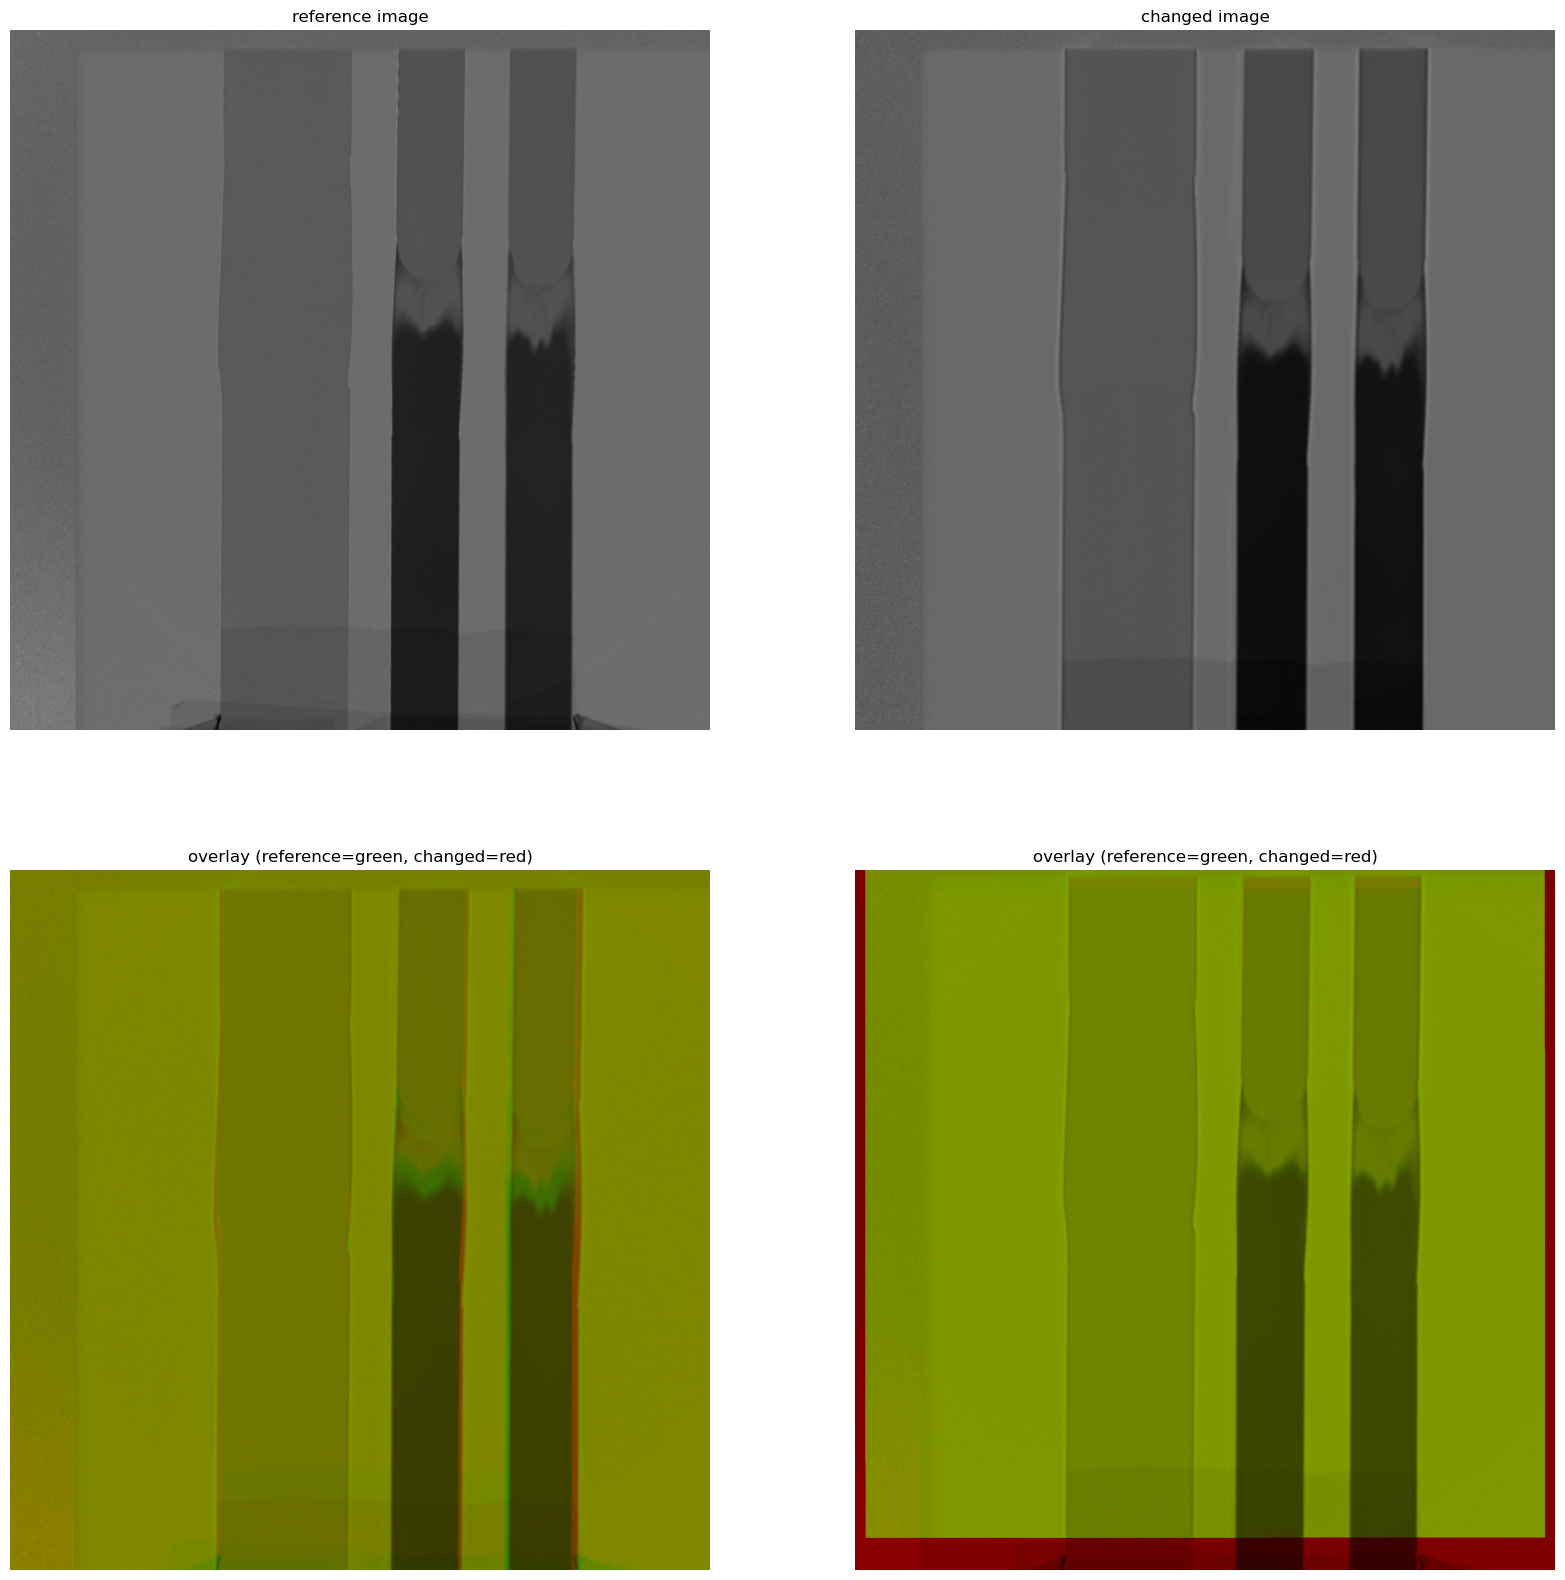

In [10]:
f, ax = plt.subplots(2, 2, figsize=(20, 20))
ax[0][0].imshow(ref, cmap='gray')
ax[0][0].set_title('reference image')
ax[0][0].axis('off')

ax[0][1].imshow(mov, cmap='gray')
ax[0][1].set_title('changed image')
ax[0][1].axis('off')

ax[1][0].imshow(before_reg)
ax[1][0].set_title('overlay (reference=green, changed=red)')
ax[1][0].axis('off');

ax[1][1].imshow(after_reg)
ax[1][1].set_title('overlay (reference=green, changed=red)')
ax[1][1].axis('off');

In [11]:
sr = StackReg(trans_algo_dict[trans_algo])
size = (unreg_dict[ref_name].shape[0], unreg_dict[ref_name].shape[1], unreg_dict[ref_name].shape[2])
reg_dict = {}
for e_pa in name_pattern:
    reg_dict[e_pa] = np.empty(size, dtype=unreg_dict[e_pa].dtype)
    reg_dict[e_pa][0] = unreg_dict[e_pa][0][:]
for idx in range(size[0]):
    if idx != 0:
        print("Registering {}".format(fname_dict[ref_name][idx]))
        _reg = sr.register_transform(unreg_dict[ref_name][0], unreg_dict[ref_name][idx])
        _reg = _reg.clip(min=0)
        reg_dict[ref_name][idx] = _reg[:]
        for ee in name_pattern:
            if ee != ref_name:
                print("Apply transform to {}".format(fname_dict[ee][idx]))
                _reg_trans = sr.transform(unreg_dict[ee][idx])
                reg_dict[ee][idx] = _reg_trans[:]

Registering TI_ACL_192.fits
Apply transform to DFI_ACL_192.fits
Apply transform to DPC_ACL_192.fits
Registering TI_ACL_187.fits
Apply transform to DFI_ACL_187.fits
Apply transform to DPC_ACL_187.fits
Registering TI_ACL_182.fits
Apply transform to DFI_ACL_182.fits
Apply transform to DPC_ACL_182.fits
Registering TI_ACL_177.fits
Apply transform to DFI_ACL_177.fits
Apply transform to DPC_ACL_177.fits
Registering TI_ACL_172.fits
Apply transform to DFI_ACL_172.fits
Apply transform to DPC_ACL_172.fits
Registering TI_ACL_167.fits
Apply transform to DFI_ACL_167.fits
Apply transform to DPC_ACL_167.fits
Registering TI_ACL_162.fits
Apply transform to DFI_ACL_162.fits
Apply transform to DPC_ACL_162.fits
Registering TI_ACL_157.fits
Apply transform to DFI_ACL_157.fits
Apply transform to DPC_ACL_157.fits
Registering TI_ACL_152.fits
Apply transform to DFI_ACL_152.fits
Apply transform to DPC_ACL_152.fits
Registering TI_ACL_147.fits
Apply transform to DFI_ACL_147.fits
Apply transform to DPC_ACL_147.fits


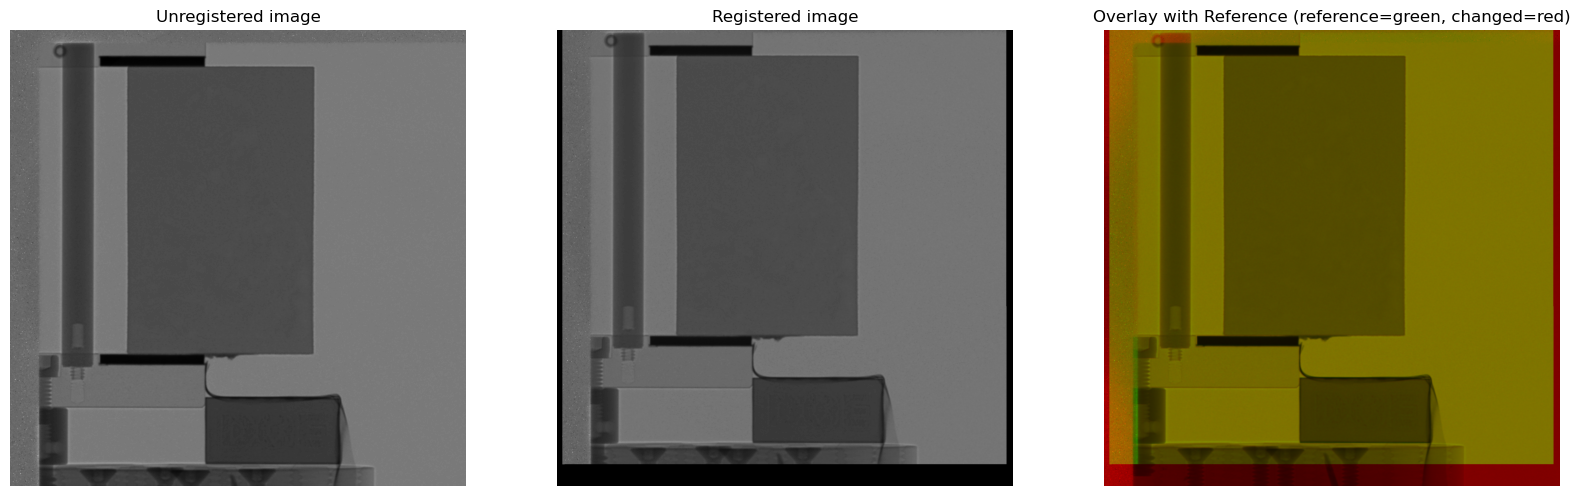

In [27]:
img_idx = -1
img_name = name_pattern[0]
#########################
f, ax = plt.subplots(1, 3, figsize=(20, 9))
check_reg =  rocku.composite_images([reg_dict[img_name][0], reg_dict[img_name][img_idx]])

ax[0].imshow(unreg_dict[img_name][img_idx], cmap='gray')
ax[0].set_title('Unregistered image')
ax[0].axis('off')

ax[1].imshow(reg_dict[img_name][img_idx], cmap='gray')
ax[1].set_title('Registered image')
ax[1].axis('off')

ax[2].imshow(check_reg)
ax[2].set_title('Overlay with Reference (reference=green, changed=red)')
ax[2].axis('off');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


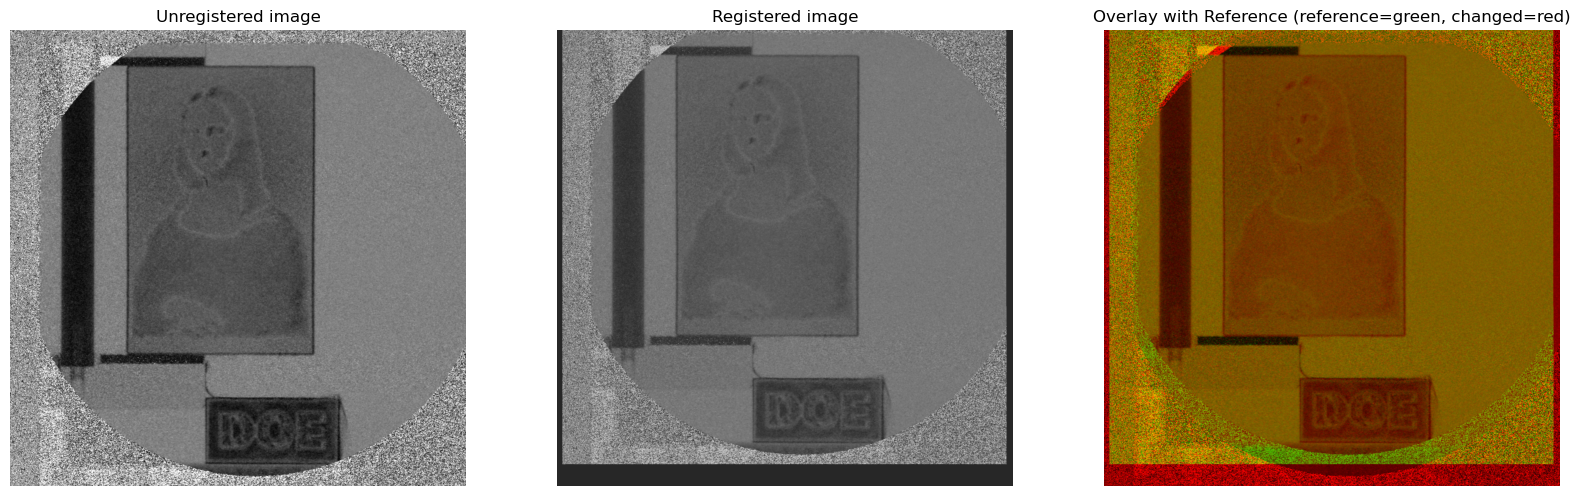

In [28]:
img_idx = -1
img_name = name_pattern[1]
#########################
f, ax = plt.subplots(1, 3, figsize=(20, 9))
check_reg = rocku.composite_images([reg_dict[img_name][0], reg_dict[img_name][img_idx]])

ax[0].imshow(unreg_dict[img_name][img_idx], cmap='gray')
ax[0].set_title('Unregistered image')
ax[0].axis('off')

ax[1].imshow(reg_dict[img_name][img_idx], cmap='gray')
ax[1].set_title('Registered image')
ax[1].axis('off')

ax[2].imshow(check_reg)
ax[2].set_title('Overlay with Reference (reference=green, changed=red)')
ax[2].axis('off');

# Save files

In [29]:
################ change save path for your own
save_to = "/HFIR/CG1D/IPTS-"+ipts+"/shared/analysis/" + sample_name
if not os.path.exists(save_to + "_" + trans_algo):
    os.mkdir(save_to + "_" + trans_algo)
for each in name_pattern:
    for i, e_name in enumerate(fname_dict_out[each]):
        fname = save_to + "_" + trans_algo + "/" + e_name + ".tiff"
        print('Saving to {} ...'.format(fname))
        img_pl = Image.fromarray(reg_dict[each][i])
        img_pl.save(fname)

Saving to /HFIR/CG1D/IPTS-26647/shared/analysis/2023_05_26_monalisa_DOE_SCALED_ROTATION/TI_ACL_0119nm.tiff ...
Saving to /HFIR/CG1D/IPTS-26647/shared/analysis/2023_05_26_monalisa_DOE_SCALED_ROTATION/TI_ACL_0207nm.tiff ...
Saving to /HFIR/CG1D/IPTS-26647/shared/analysis/2023_05_26_monalisa_DOE_SCALED_ROTATION/TI_ACL_0296nm.tiff ...
Saving to /HFIR/CG1D/IPTS-26647/shared/analysis/2023_05_26_monalisa_DOE_SCALED_ROTATION/TI_ACL_0384nm.tiff ...
Saving to /HFIR/CG1D/IPTS-26647/shared/analysis/2023_05_26_monalisa_DOE_SCALED_ROTATION/TI_ACL_0473nm.tiff ...
Saving to /HFIR/CG1D/IPTS-26647/shared/analysis/2023_05_26_monalisa_DOE_SCALED_ROTATION/TI_ACL_0561nm.tiff ...
Saving to /HFIR/CG1D/IPTS-26647/shared/analysis/2023_05_26_monalisa_DOE_SCALED_ROTATION/TI_ACL_0650nm.tiff ...
Saving to /HFIR/CG1D/IPTS-26647/shared/analysis/2023_05_26_monalisa_DOE_SCALED_ROTATION/TI_ACL_0738nm.tiff ...
Saving to /HFIR/CG1D/IPTS-26647/shared/analysis/2023_05_26_monalisa_DOE_SCALED_ROTATION/TI_ACL_0827nm.tiff ...
S